In [1]:
from numpy.linalg import qr, svd

from scipy.linalg import hadamard, subspace_angles

import math

import jax
import jax.numpy as jnp
from jax import grad, random, vmap
import optax

from kernel_sca import *
from utils import *
from kernels import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV

import wandb

from sklearn.cross_decomposition import CCA

In [2]:
d = 2
l = 0.0
kernel = 'linear'
U = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_26_6_2024/kernel/{d}d_neural/projection_{d}d_l{l}_{kernel}.npy").swapaxes(1,2)
V = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_26_6_2024/kernel/{d}d_torques/projection_{d}d_l{l}_{kernel}.npy").swapaxes(1,2)
K, T, _ = U.shape
U = U.reshape(-1, d) 
V = V.reshape(-1, d)  #(K*T, d)


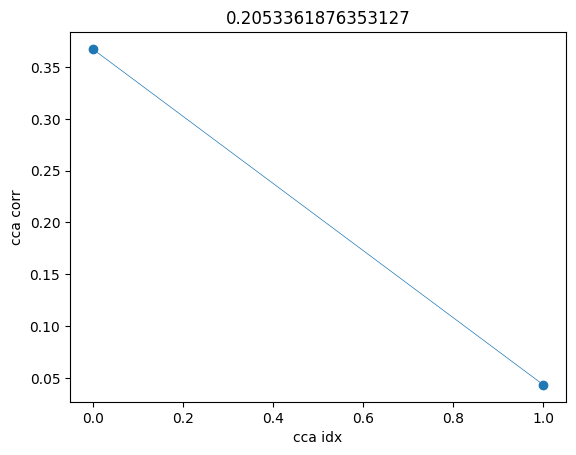

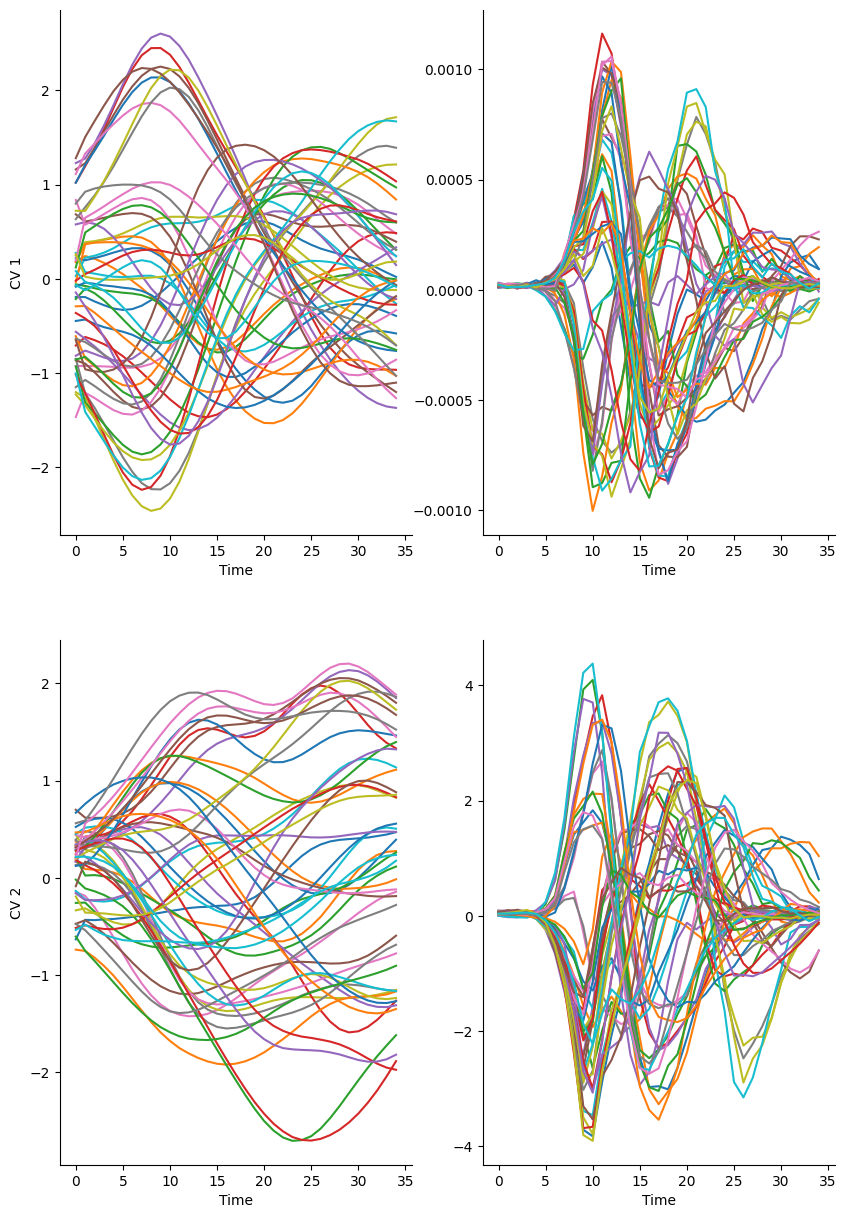

In [3]:
cca = CCA(n_components=d)
cca.fit(U, V)
U_c, V_c = cca.transform(U, V)

corrs = [np.corrcoef(U_c[:, i], V_c[:, i])[0, 1] for i in range(d)]    
plt.plot(corrs, marker='o', linewidth=0.5)
plt.xlabel('cca idx')
plt.ylabel('cca corr')
plt.title(np.mean(corrs))

U_c = U_c.reshape(K, T, d)
V_c = V_c.reshape(K, T, d)

n_cond = 50

fig, axs = plt.subplots(d, 2, figsize=(10,15))
for j in range(d): 
    for i in range(n_cond):
        axs[j, 0].plot(U_c[i,:,j])
        axs[j, 1].plot(V_c[i,:,j])

        axs[j, 0].set_ylabel(f'CV {j+1}')

for ax_row in axs:
    for ax in ax_row:
        #ax.set_ylabel('CV')
        ax.set_xlabel('Time')
        ax.spines[['right', 'top']].set_visible(False)